<a href="https://colab.research.google.com/github/Fiiila/MS1_2022/blob/main/MS1_semestralka02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MS1 - Semestralni prace 02

In [ ]:
#importy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1) Načtení dat signálu

In [ ]:
#stazeni signalu z githubu
! git clone https://github.com/Fiiila/MS1_2022.git

Cloning into 'MS1_2022'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [ ]:

#nacteni signalu pomoci pandas
signal_pd = pd.read_csv("MS1_2022/signal.csv",header=None)
#prevod na numpy
signal = signal_pd.to_numpy()
signal = signal[:,0]

## 2) Zobrazení časového vývoje signálu

frequency of signal: 80000 Hz
signal T: 1.25e-05 s


Text(0.5, 1.0, 'Průběh importovaného signálu v čase')

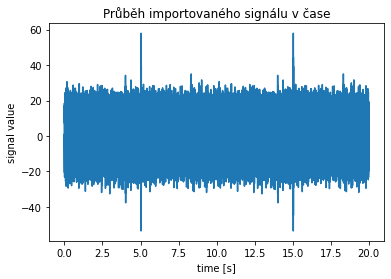

In [ ]:
#vytvoreni casove osy na zaklade frekvence signalu
freq = 80000 #Hz
print(f"frequency of signal: {freq} Hz")
T = 1/freq
print(f"signal T: {T} s")
time = np.array(range(0,len(signal)))*T
plt.figure()
plt.plot(time, signal)
plt.xlabel("time [s]")
plt.ylabel("signal value")
plt.title("Průběh importovaného signálu v čase")

## 3) Určení časových parametrů signálu

In [ ]:
#zobrazeni parametru signalu
print(f'stredni hodnota signalu: {signal.mean():.4f}')
energy = signal.dot(signal)*T
print(f'energie signalu: {energy:.4f}')
power = (1/(T*len(signal)))*energy
print(f'vykon signalu: {power:.4f}')
print(f'efektivni hodnota signalu: {np.sqrt(power):.4f}')



stredni hodnota signalu: -0.0003
energie signalu: 1025.6469
vykon signalu: 51.2823
efektivni hodnota signalu: 7.1612


## 4) Určení frekvenčních parametrů signálu

dominantni frkvence: 4798.2Hz


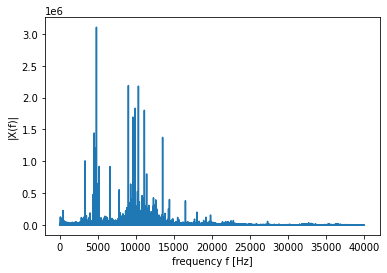

In [ ]:
# spektrum signálu
spectrum = np.fft.fft(signal)
power_spectrum = abs(spectrum)
frequencies = np.fft.fftfreq(len(spectrum),1/freq)
i = frequencies>0
plt.figure()
plt.plot(frequencies[i],2*power_spectrum[i])
plt.xlabel("frequency f [Hz]")
plt.ylabel("|X(f)|")
plt.savefig("power_spectrum.eps", format="eps")
# dominantní frekvence
print(f'dominantni frkvence: {frequencies[np.argmax(abs(spectrum))]}Hz')

## 5) Ověření principu neurčitosti

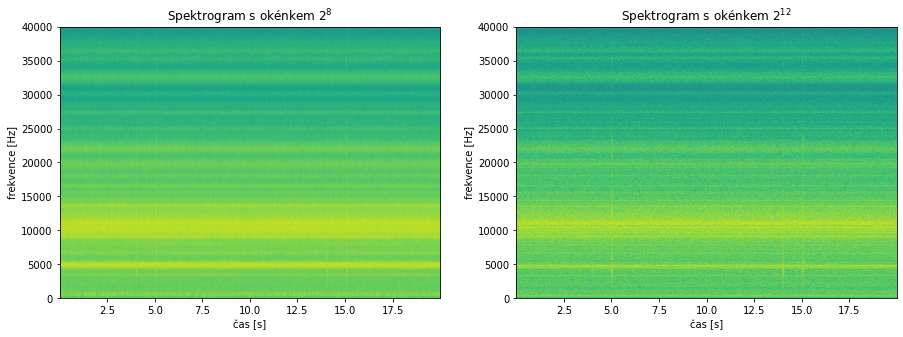

In [ ]:
#okenkova funkce
plt.figure(figsize=(15,5))
# mensi okenko
plt.subplot(1,2,1)
plt.title("Spektrogram s okénkem $2^8$")
plt.xlabel("čas [s]")
plt.ylabel("frekvence [Hz]")
spectrogram1 = plt.specgram(signal,Fs=freq,NFFT=2**8,mode="default", window=plt.mlab.window_hanning)
# vetsi okenko
plt.subplot(1,2,2)
plt.title("Spektrogram s okénkem $2^{12}$")
plt.xlabel("čas [s]")
plt.ylabel("frekvence [Hz]")
spectrogram2 = plt.specgram(signal,Fs=freq,NFFT=2**12,mode="default", window=plt.mlab.window_hanning)

## 6) Nalezení časo-frekvenční události

Na vykreslených grafech lze pozorovat 4 časo-frekvenční události v časech 4s, 5s, 14s a 15s.

casy ve kterych byla nalezena maxima: [ 4.01312105 14.01392111 14.01232099 15.04600368  5.050004   14.02352188
  4.00992079  4.01152092  5.04520362 14.01072086  4.02272182 15.05080406
 15.04280342  5.04360349 15.04440355  5.04200336  5.0388031  15.03960317
  5.04040323 15.0412033 ]


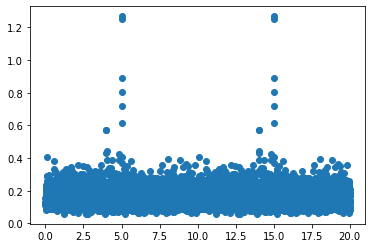

In [ ]:
#nalezeni caso-frekvencnich udalosti
spectrogram = spectrogram1
#suma jednotlivych sloupcu
column_sum = np.sum(spectrogram[0],axis=0)
#vykresleni sum v jednotlivych casovych okamzicich
plt.figure()
plt.scatter(np.arange(0,(len(time)/2**12),(len(time)/2**12)/len(column_sum))*(T*2**12),column_sum)
#vypsani maxim
print(f"casy ve kterych byla nalezena maxima: {np.argpartition(column_sum,-4)[-20:]*((len(time)/2**12)/len(column_sum))*(T*2**12)}")